In [1]:
import pandas as pd
train=pd.read_csv('https://datahack.analyticsvidhya.com/media/workshop_train_file/train_gbW7HTd.csv')
test=pd.read_csv('https://datahack.analyticsvidhya.com/media/workshop_test_file/test_2AFBew7.csv')

In [2]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [3]:
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


In [4]:
categorical=train.dtypes.loc[train.dtypes=='object'].index

In [5]:
print (categorical)

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [6]:
train[categorical].apply(lambda x:len(x.unique())) #determine number of unique values in each column

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

In [7]:
train['Race'].value_counts()/train.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

In [8]:
#cross tabulation
ct=pd.crosstab(train['Sex'],train['Income.Group'],margins=True)
print (ct)

Income.Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


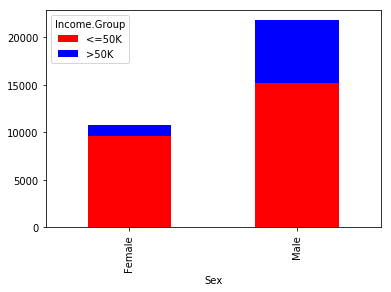

In [9]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

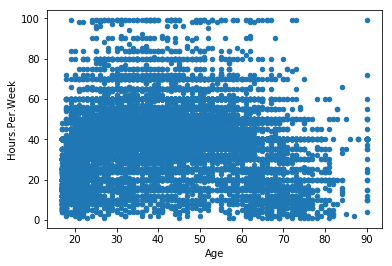

In [10]:
train.plot('Age','Hours.Per.Week',kind='scatter')

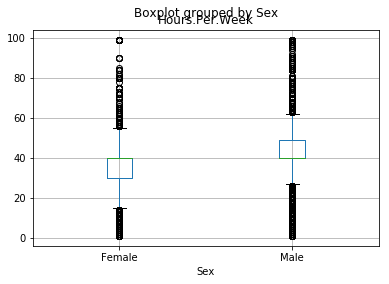

In [11]:
train.boxplot(column='Hours.Per.Week',by='Sex')

In [12]:
train.apply(lambda x: sum(x.isnull()))

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [13]:
test.apply(lambda x: sum(x.isnull()))

ID                  0
Age                 0
Workclass         963
Education           0
Marital.Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    274
dtype: int64

In [14]:
from scipy.stats import mode

In [15]:
#mode(train['Workclass']).mode[0]

In [16]:
impute_var=['Workclass','Occupation','Native.Country']

In [17]:
for v in impute_var:
    train[v].fillna(mode(train[v].astype(str)).mode[0],inplace=True)
    test[v].fillna(mode(test[v].astype(str)).mode[0],inplace=True)

C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [18]:
train.apply(lambda x: sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

In [19]:
test.apply(lambda x: sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
dtype: int64

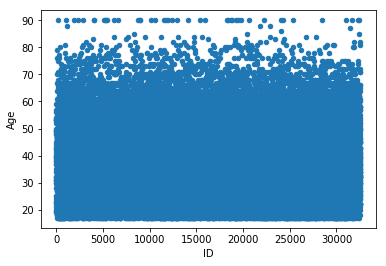

In [20]:
train.plot('ID','Age',kind='scatter')

In [21]:
train[categorical].apply(lambda x:len(x.unique())) #determine number of unique values in each column

Workclass          8
Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64

In [22]:
for col in categorical:
    frq=train[col].value_counts()/train.shape[0]
    combining_cat=frq.loc[frq.values<.05].index
    
    for cat in combining_cat:
        train[col].replace({cat:'Others'},inplace=True)
        


In [23]:
train[categorical].apply(lambda x:len(x.unique()))

Workclass         4
Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
Income.Group      2
dtype: int64

In [24]:
category=categorical[:-1]
category

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country'],
      dtype='object')

In [25]:
for col in category:
    frq=test[col].value_counts()/test.shape[0]
    combining_cat=frq.loc[frq.values<.05].index
    
    for cat in combining_cat:
        test[col].replace({cat:'Others'},inplace=True)


In [26]:
test[category].apply(lambda x:len(x.unique()))

Workclass         4
Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()
for(v)in categorical:
    train[v]=le.fit_transform(train[v])

In [29]:
for(v)in category:
    test[v]=le.fit_transform(test[v])

In [30]:
train.dtypes

ID                int64
Age               int64
Workclass         int64
Education         int64
Marital.Status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Hours.Per.Week    int64
Native.Country    int64
Income.Group      int64
dtype: object

In [31]:
test.dtypes

ID                int64
Age               int64
Workclass         int64
Education         int64
Marital.Status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Hours.Per.Week    int64
Native.Country    int64
dtype: object

In [32]:
#categorical=categorical[1:]

In [33]:
categorical

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
target='Income.Group'
features=[x for x in train.columns if x not in ['ID',target]]

In [36]:
print (features)


['Age', 'Workclass', 'Education', 'Marital.Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Hours.Per.Week', 'Native.Country']


In [37]:
model=DecisionTreeClassifier(max_depth=10,min_samples_leaf=100,max_features='sqrt')
model.fit(train[features],train[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
predictions_train=model.predict(train[features])

In [39]:
predictions_test=model.predict(test[features])

In [40]:
predictions_train[:20]

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [42]:
train[target].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     1
10    1
11    1
12    0
13    0
14    1
15    0
16    0
17    0
18    0
19    1
Name: Income.Group, dtype: int64

In [41]:
predictions_test[:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy=accuracy_score(train[target],predictions_train)

In [45]:
print('Train Accuracy is:%f'%accuracy)

Train Accuracy is:0.818924


In [46]:
from sklearn import svm

In [ ]:
C=1.0
svc = svm.SVC(kernel='linear', C=C).fit(train[features],train[target])
svc_predict=svc.predict(train[features])
accuracy_score(y_true = train[target], y_pred = svc_predict)